In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

C:\Users\celin\AppData\Local\Temp\ipykernel_1396\2406703421.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pe_vs_a = pd.read_csv("A/energy_volume.dat", sep="\s", header=None, names=["lattice_constant", "potential_energy"])


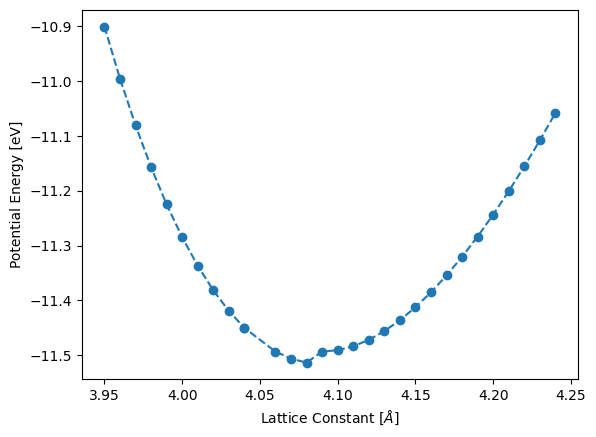

In [ ]:
# Part A 
# Potential Energy vs Lattice Constant
pe_vs_a = pd.read_csv("A/energy_volume.dat", sep="\s", header=None, names=["lattice_constant", "potential_energy"])
plt.plot(pe_vs_a["lattice_constant"], pe_vs_a["potential_energy"], marker="o", linestyle="--")
plt.xlabel(r"Lattice Constant [$\AA$]")
plt.ylabel(r"Potential Energy [eV]")
plt.show()